In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 3

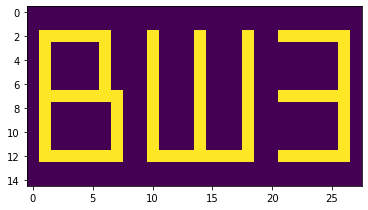

In [2]:
#3
a = np.zeros((15, 28))
#В
a[2: -2 ,1] = 1; a[2 ,2:6] = 1
a[2:7 ,6] = 1; a[7: -2 ,7] = 1
a[7 ,2:7] = 1; a[ -3 ,2:7] = 1

#Ш
a[2: -2, 10] = 1; a[2: -2,14] = 1;
a[2: -2, 18] = 1; a[-3,10:19] = 1

#Э
a[2, 21:27] = 1
a[7, 21:27] = 1
a[12, 21:27] = 1
a[2:13, 26] = 1

plt.imshow(a)

In [3]:
np.linalg.matrix_rank(a)

5

In [4]:
u, s, v = np.linalg.svd(a)
print("S", s)

S [8.65821175e+00 4.21505898e+00 2.18518482e+00 1.81299689e+00
 4.54595131e-01 3.29870361e-16 2.07512873e-16 9.72341658e-17
 8.74200380e-17 2.33806551e-17 4.21590086e-33 9.03187742e-49
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


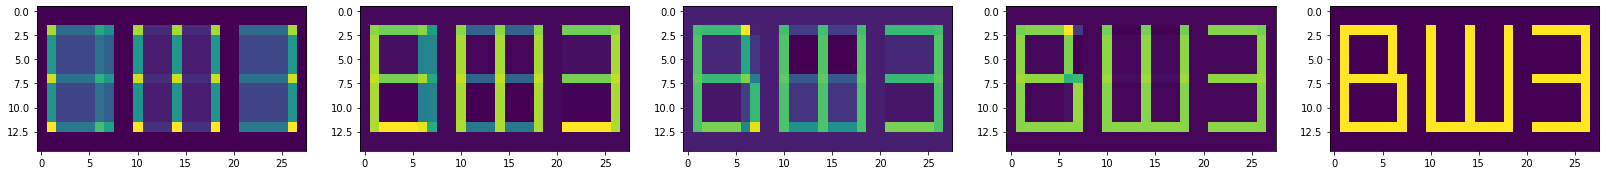

In [5]:
fig, ax = plt.subplots(1, 5)
fig.set_figwidth(28)
fig.set_figheight(28)
for i in range(5):
    k = i + 1
    uk = u[:,:k] 
    vk = v[:k,:]
    ak = uk @ np.diag(s[:k]) @ vk
    ax[i].imshow(ak)

In [6]:
#5
c = np.array([[1, 0.9, 0.7],
              [0.9, 1, 0.4],
              [0.7, 0.4, 1]])
c_1 = np.array(c, copy=True, dtype = float)
c_1[1, 2] = 0.3
c_1[2, 1] = 0.3
print(np.linalg.eigvals(c))
np.linalg.eigvals(c_1)

[2.35363603 0.03034736 0.6160166 ]


array([ 2.29672779, -0.00735244,  0.71062465])

In [7]:
def get_cor(c):
    w, v = np.linalg.eig(c)
    for e in w:
        if e < 0:
            e = 0
    
    b = np.zeros(v.shape)
    for i in range(v.shape[1]):
        b[:, i] = v[:, i] * w[i]
    
    for i in range(v.shape[0]):
        b[i, :] = b[i, :] / np.linalg.norm(b[i, :])
    return b @ b.T

In [8]:
c_2 = get_cor(c_1)
c_2

array([[1.        , 0.9615134 , 0.87604015],
       [0.9615134 , 1.        , 0.70990424],
       [0.87604015, 0.70990424, 1.        ]])

In [9]:
np.linalg.eigvals(c_2)

array([2.70246667e+00, 2.59397546e-05, 2.97507391e-01])

In [10]:
print(c_2 - c_1)

[[0.         0.0615134  0.17604015]
 [0.0615134  0.         0.40990424]
 [0.17604015 0.40990424 0.        ]]


# Задание 4

In [11]:
#4 
a = np.zeros((2, 10))
for i in range(10):
    a[:, i] = np.array([(19 - 2*i) / 2, 1])
a

array([[9.5, 8.5, 7.5, 6.5, 5.5, 4.5, 3.5, 2.5, 1.5, 0.5],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]])

In [14]:
u, s, v = np.linalg.svd(a)
print("U", u)
print("S", s)
print("V", v.shape)

U [[-0.98872048 -0.14977252]
 [-0.14977252  0.98872048]]
S [18.44109698  1.55754364]
V (10, 10)


In [18]:
s_inv = np.zeros((10, 2))
s_inv[0, 0] = 1 / s[0]
s_inv[1, 1] = 1 / s[1]
a_inv = v.T @ s_inv @ u.T

In [19]:
a_inv

array([[ 0.05454545, -0.17272727],
       [ 0.04242424, -0.11212121],
       [ 0.03030303, -0.05151515],
       [ 0.01818182,  0.00909091],
       [ 0.00606061,  0.06969697],
       [-0.00606061,  0.13030303],
       [-0.01818182,  0.19090909],
       [-0.03030303,  0.25151515],
       [-0.04242424,  0.31212121],
       [-0.05454545,  0.37272727]])

In [20]:
a @ a_inv

array([[ 1.00000000e+00,  6.38378239e-16],
       [-6.93889390e-18,  1.00000000e+00]])